<a href="https://colab.research.google.com/github/alberto1971/Curso-de-introduccion-a-Big-Data-Parte-3-nov2021/blob/main/4_Reduccion_de_dimensiones_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style='color: blue;'>REDUCCION DE DIMENSIONALIDAD</h1>

En este capitulo se introduce el algoritmo __*Principal Components Analysis*__ (PCA) y se ilustra su utilidad para la compresión de los datos. Se trata de un algoritmo de aprendizaje no supervisado que transforma los datos de entrada.

La compresion de datos es interesante porque nos permite obtener mayor eficiencia en otros algoritmos (ahorro de memoria y aceleracion de calculos) y facilita la visualización de conjuntos de datos complejos o de muchas dimensiones.

# 0. Cargamos las librerías

Cargamos todas las librerías de DataScience y configuramos matplot lib para que muestre las imagenes inline, ie. en la misma celda que la genera.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# 1. Cargamos los datos

Para ilustrar este algoritmo, vamos a generar un conjunto de datos de dos variables, que están correlacionadas entre sí.

Para ello generamos 100 datos en dos variables utilizando el generador de numpy de datos con distribución normal[normal](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.normal.html):

Text(0, 0.5, 'x_2')

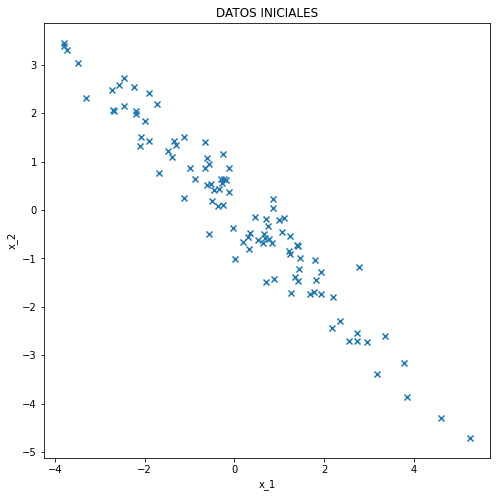

In [2]:
rnd = np.random.RandomState(42) #It's the answer to Life, The Universe, and Everything from Douglas Adams' Hitchhiker's Guide to the Galaxy
X_ = rnd.normal(size=(100, 2))

#tranformamos los datos para correlacionarlos
X_transf = np.array(np.array([[-0.47064751, -0.09790047], [ 1.88416925, -1.74263228]]))
X_blob = np.dot(X_,X_transf)

#los representamos en una gráfica
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1)

ax.set_title("DATOS INICIALES")
ax.scatter(X_blob[:, 0], X_blob[:, 1],marker='x')
ax.set_xlabel("x_1")
ax.set_ylabel("x_2")

Como puede verse tenemos un conjunto de datos con dos variables muy correlacionadas. Podríamos buscar la direccion en la que varían los datos y transformarlas variables para expresarlas en unos nuevos ejes de coordenadas.

Los ejes de coordenadas que siguen las direcciones de la mayor variación son los que denominaremos los __*componentes principales*__. Si podemos expresar los datos en estos nuevos ejes, podemos incluso quedarnos con una de las componentes y así reducimos la información del conjunto de datos original.


# 3. Principal component analysis (PCA)

Típicamente los datos de entrada tienen ya muchas variables y provienen de varias fuentes, por lo que suelen contener muchas correlaciones. Lo interesante es eliminar esa información redundante. Nuestro objetivo es reducir el numero de variables del conjunto de datos original, comprimir los datos intentando no perder información.

Generamos el modelo PCA que tratará de encontrar la direccion de máxima variación y construir <u>__una superficie de menor dimensión sobre la que al proyectar los datos sobre ella el ERROR de PROYECCION es minimo__</u>


## 3.1 El algoritmo

En *SKLearn*, <a href='https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA'>PCA </a> es una clase de transformación que aprende sus componentes con el método *__.fit__* y puede utilizarse posteriormente para proyectar nuevos datos a los componentes principales entrenados con el método *__.transform__*.

PCA utiliza el método de descomposición matricial que se denomina <a href='https://es.wikipedia.org/wiki/Descomposici%C3%B3n_en_valores_singulares'>*Descomposición de Valores Singulares* o *Singular Value Decomposition* (SVD)</a> para encontrar una base nueva base vectorial de menor dimension que la original y que sigue las direcciones de máxima variación de los datos originales.

SVD es un método de descomposición de matrices similar a la descomposición en vectores y valores propios de las matrices cuadradas, solo que es más general y puede aplicarse a matrices de cualquier rango ($mxn$).

<div class="alert alert-block alert-info">Dada una matriz A $m x n$ de números reales podemos descomponerla en:<br>
$A = U \Sigma V^T$
<br>
donde:<br>
- $U$ es una matriz cuadrada $m x m$ que contiene una base ortogonal de las columnas de $A$<br>
- $S$ o también llamada $\Sigma$ es una matriz diagonal $m x n$ con los valores singulares $s_i$<br>
- y $V^T$ es la matriz transpuesta de $V$, matriz cuadrada $n x n$ que contiene una base ortogonal de las filas de $A$, o de las columnas de $A^T$
</div>


En python podemos hacer SVD con las librerías *Scipy* (<a href='https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.svds.html'>referencia scipy.svd</a>), vamos a probarla:

In [3]:
from scipy.linalg import svd

# definimos una matrizcon distribucion normal m=10 n=2 RandomState=42 (m datos de n dimensiones)
rnd = np.random.RandomState(42) 
X1_ = rnd.normal(size=(10, 2))

#tranformamos los datos para correlacionarlos
X_transf = np.array([[-0.47064751, -0.09790047], [ 1.88416925, -1.74263228]])
A = np.dot(X1_,X_transf)
#A= A - A.mean(axis=0) para probar que PCA centra en torno a la media de la columna

#Realiza la Singular-value decomposition
U, s, VT = svd(A)

# s son solo los valores propios, para construir la matriz S o Sigma
# creamos una matriz de ceros y le ponemos los n valores singulares en la diagonal
print('valores singulares ordenados s-> ',s)
Sigma = np.zeros((A.shape[0], A.shape[1]))
Sigma[:A.shape[1], :A.shape[1]]= np.diag(s)
#print(Sigma)

# reconstruct en efecto A=USVt
B = U.dot(Sigma.dot(VT))
#print(B)
#print(A)
print('A=USVt? ',np.allclose(A,B))

# V es una base ortonormal de A.T
# AV=US la transformación de los datos
# Las nuevas coordenadas de los datos en base V son US
C= A.dot(VT.T)
D= U.dot(Sigma)
#print(C)
#print(D)

print('Av=US? ',np.allclose(C,D))

#Muestra el valor de los componentes principales
print('Componentes principales:\n' ,VT.T)

valores singulares ordenados s->  [7.65557856 1.08643313]
A=USVt?  True
Av=US?  True
Componentes principales:
 [[ 0.70135487  0.71281228]
 [-0.71281228  0.70135487]]


<u>__REDUCCION DE DIMENSIONALIDAD__</u>: Podemos probar que si truncamos la matriz de valores singulares $V$ para quedarnos con una base de $r<n$ de menor dimension, tenemos una versión aproximada de los datos originales.

Comprueba que si reducimos la dimension de $V$ de $nxn$ a $nxr$ y de $S$ de $mxn$ a $mxr$ podemos calcular la matriz A de forma aproximada:

In [4]:
# Reduccion de dimensionalidad
# rango hasta donde nos quedamos k=1
# comprobar que con 2 si da lo mismo, pero con uno es parecido pero no
r = 1
rSigma = Sigma[:, :r]
rVT = VT[:r, :]

B=U.dot(rSigma.dot(rVT))
print('A=USVt? ',np.allclose(A,B))
#print(B)
#print(A)
print(A-B)

A=USVt?  False
[[-0.15500471 -0.15251324]
 [-0.05538168 -0.0544915 ]
 [ 0.04728477  0.04652474]
 [-0.38882799 -0.38257815]
 [ 0.18198641  0.17906124]
 [ 0.09338027  0.09187932]
 [-0.23452829 -0.23075859]
 [ 0.44847561  0.44126702]
 [ 0.31884836  0.31372334]
 [ 0.139918    0.13766902]]


Ejecutamos el algoritmo <a href='https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA'>PCA </a> , para comprobar que es precisamente esta descomposición de valores singulares:

<div class="alert alert-block alert-warning">*__NOTA__*: PCA centra los datos en torno a las medias por lo que para obtener el mismo valor de los componentes principales con SVD y PCA es necesario centrar previamente los datos.

Añade A= A - A.mean(axis=0) al codigo de SVD y verás que obtenemos lo mismo
</div>

In [5]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(A)

# parámetros del modelo
print('Componentes principales:\n' ,pca.components_)


Componentes principales:
 [[-0.70386503  0.71033373]
 [-0.71033373 -0.70386503]]


## 3.2 El modelo

Entendido el algoritmo, correremos este modelo en los datos generados inicialmente $X_{blob}$ para reducir su dimensionalidad. PCA transforma los datos iniciales del sistema de referencia $x_1,x_2$ a una base de referencia ortogonal  $v_1,v_2$ en las direcciones de mayor variacion. Podemos tomar un subespacio de esta nueva base, por ejemplo solo la coordenada $v_1$ y obtenemos una representación comprimida de los datos originales :

(-8.0, 8.0)

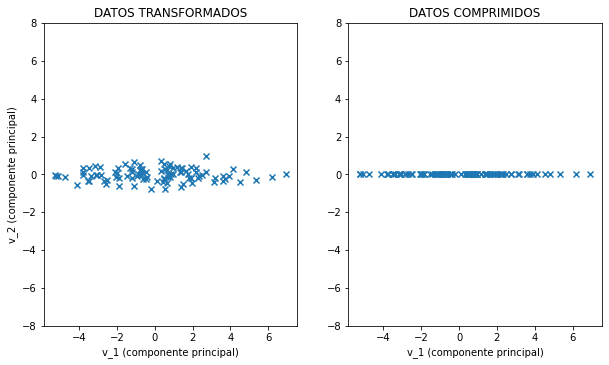

In [6]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_blob)
X_pca = pca.transform(X_blob)

fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(1, 2, 1)

ax1.set_title("DATOS TRANSFORMADOS")
ax1.scatter(X_pca[:, 0], X_pca[:, 1], marker='x')
ax1.set_xlabel("v_1 (componente principal)")
ax1.set_ylabel("v_2 (componente principal)")
ax1.set_aspect('equal')
ax1.set_ylim(-8, 8)

ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title("DATOS COMPRIMIDOS")
ax2.scatter(X_pca[:, 0], np.zeros(X_pca.shape[0]), marker='x')
ax2.set_xlabel("v_1 (componente principal)")
ax2.set_aspect('equal')
ax2.set_ylim(-8, 8)

PCA encuentra __la dirección de máxima variación que alinea con $v_1$__. La componente $v_2$ es la componente ortogonal a $v_1$, en dos diemnsiones no hay más grados de libertad.

Si proyectamos los datos sobre $v_1$, obtenemos la versión comprimida de los datos originales.

# 3. Parámetros del modelo

Los parámetros del modelo nos dan los valores de ajuste que ha obtenido el algoritmo. Veamos los vectores singulares obtenidos:

In [7]:
pca.components_

array([[ 0.73960352, -0.67304282],
       [ 0.67304282,  0.73960352]])

Podemos comprobar que son base ortonormal. Calculamos la norma del primer vector singular $v_1$:

In [8]:
np.linalg.norm(pca.components_[0])

0.9999999999999999

Los valores singulares_

In [9]:
pca.singular_values_ 

array([25.54184245,  3.32887363])

El valor medio que ha utilizado para centrar los datos en cada dimension:

In [10]:
pca.mean_

array([ 0.11849385, -0.04797461])

# 4. Reconstruccion de los datos

Para obtener los datos comprimidos en el sistema de coordenadas original debemos de usar el método *__inverse_transform__*

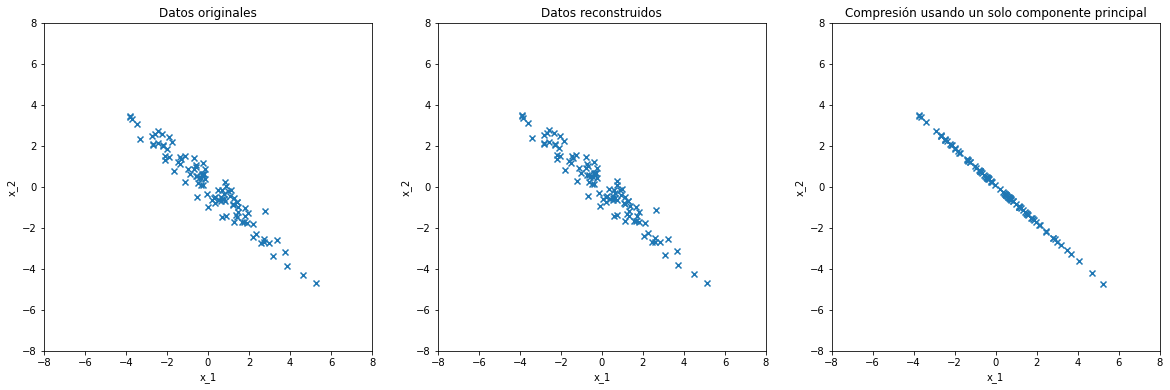

In [11]:
fig = plt.figure(figsize=(20,10))

# Los datos originales X_blob
ax2 = fig.add_subplot(1, 3, 1)
ax2.set_title("Datos originales")
ax2.scatter(X_blob[:, 0], X_blob[:, 1], marker='x')
ax2.set_xlabel("x_1")
ax2.set_ylabel("x_2")
ax2.set_aspect('equal')
ax2.set_xlim(-8, 8)
ax2.set_ylim(-8, 8)

# Los datos reconstruidos tras usar PCA -> X_blob = USV
# US = X_pca = pca.transform(X_blob)  -> los datos X_blob en la nueva base V
# USV = X_pca . pca_components  -> porque V=pca_components

X_reconst = np.dot(X_pca,pca.components_)

ax1 = fig.add_subplot(1, 3, 2)
ax1.set_title("Datos reconstruidos")
ax1.scatter(X_reconst[:, 0], X_reconst[:, 1], marker='x')
ax1.set_xlabel("x_1")
ax1.set_ylabel("x_2")
ax1.set_aspect('equal')
ax1.set_xlim(-8, 8)
ax1.set_ylim(-8, 8)


# Los datos parcialmente reconstruidos o comprimidos, tomando una base con solo un vector singular v_1
pca_n1 = PCA(n_components=1)
pca_n1.fit(X_blob)
X_pca_n1 = pca_n1.transform(X_blob)
X_inverse = pca_n1.inverse_transform(X_pca_n1)

ax3 = fig.add_subplot(1, 3, 3)
ax3.set_title("Compresión usando un solo componente principal")
ax3.scatter(X_inverse[:, 0], X_inverse[:, 1], marker='x')
ax3.set_xlabel("x_1")
ax3.set_ylabel("x_2")
ax3.set_aspect('equal')
ax3.set_xlim(-8, 8)
ax3.set_ylim(-8, 8);

Los nuevos datos comprimidos mantienen la mayor parte de la variación o información del conjunto de datos originales, pero como puede verse, se pierde información.

# 5. Evaluación del modelo

Típicamente trajaremos con muchas variables y no resultará intuitivo cuantos componentes principales es recomendable mantener. Para ello se toma el criterio de que los datos comprimidos mantengan la mayor información o variación posible. Esto implica que la compresión los han movido poco, o sea que están proyectados en una superficie muy proxima con respecto de los originales. ¿Cómo medimos esto?. 

Pensemos que inicialmente la variación o información total de los $m$ datos $x$ es:

$ \frac{1}{m} \sum_{i=1}^{m} ||x^{(i)}||^2$

La variación de un dato es su norma, o como de lejos está la muestras del origen.

Una vez comprimidos los datos, conseguimos $x_{aprox}$ y hemos perdido una variación total en las $m$ muestras que es:

$ \frac{1}{m} \sum_{i=1}^{m} ||x^{(i)}-x_{aprox}^{(i)}||^2$

Que es el error cuadrático medio de la proyeccion de las muestras sobre la nueva superficie.
<br><br>
<div class="alert alert-block alert-info">
Se intenta elegir un rango $r$ de manera que el ratio de perdida de variación: 
<br><br>
$ \frac{\frac{1}{m} \sum_{i=1}^{m} ||x^{(i)}-x_{aprox}^{(i)}||^2}{ \frac{1}{m} \sum_{i=1}^{m} ||x^{(i)}||^2} \le \frac{k}{100}$  (k%)
<br><br>

Sea pequeño. Tipicamente se especifica en términos de $100-k$% y se toma que se mantenga se mantenga entre rangos del $90$% al $99$% de la información.
</div>

Este criterio tiene una interpretación con significado gráfico, más alla de una eleccion arbitraria de un numero $r$ de componentes principales.

En la practica los datasets tienen variables muy correlacionadas y se puede reducir la dimension de $n\rightarrow r$  con $r<<n$  y mantener el $99$% de la variación total de los datos.
<br><br>

<div class="alert alert-block alert-info">
Este valor puede calcularse directamente a partir de los valores singulares:
<br><br>

$ 1- \frac{ \sum_{i=1}^{r} s_i^2}{\sum_{i=1}^{n} s_i^2}  \le \frac{k}{100}$  (k%)

<br><br>

Tomando los $r$ primeros vectores y valores singulares.
</div>



El modelo PCA tiene los parámetros __*explained_variance_*__ y __*explained_variance_ratio_*__ que nos dicen la variación que explica cada uno de los componentes principales o vectores singulares: 

In [12]:
print(pca.explained_variance_)  


[6.58975471 0.11193333]


In [13]:
print(pca.explained_variance_ratio_)  


[0.98329774 0.01670226]


Podemos calcularlo también a partir de los valores singulares:

In [14]:
np.square(pca.singular_values_) / np.square(pca.singular_values_).sum()

array([0.98329774, 0.01670226])

# 5. Consejos importantes

PCA es al fin y al cabo un cambio de sistema de coordenadas dictado por las muestras de nuestro conjunto de datos. Por ello a la hora de usar PCA debe de tenerse en cuenta que:

- Es importante __<u>escalar los datos</u>__ con el *standardScaler* para asegurarnos que el grado de variación de todas las variables es similar. Como PCA va buscando como componentes principales las direcciones de mayor variación, si no escalamos los datos estamos prefijando las direcciones de los componentes. Lee el ejemplo de <a href="https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html">recomendación de escalado</a>.
    
    

- __<u>Solo debe de aplicarse PCA a los datos de entrenamiento</u>__. Generalmente aplicamos PCA para comprimir datos para inyectarlos a otro algoritmo y que este sea mas eficiente. Por tanto, el algoritmo se entrena con los datos comprimidos en un determinado sistema de referencia que depende de las muestras originales. Si posteriormente conseguimos más muestras para aplicar al algoritmo, estas deben de suministrarse al algoritmo aplicandoles la transformación del PCA de los datos de entrenamiento.



- Hay que recordar que PCA elimina información del conjunto de datos original, por lo que __<u>no debe de usarse si no es necesario</u>__.



- __<u>PCA no ayuda a simplificar un modelo</u>__.También es importante pensar que si un modelo no da buenos resultados porque es muy complejo y utiliza muchas variables, aplicar PCA no mejora la situación. PCA mantiene casi toda la información del conjunto de datos, por lo que no ayudará y es recomendable cambiar de algoritmo o simplificarlo.